### import Libraries dan Load Dataset
Mengimpor pustaka yang diperlukan.
Memuat dataset dari file yang diberikan.
Menampilkan beberapa baris pertama dari dataset untuk memastikan bahwa data dimuat dengan benar

In [1]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse
import matplotlib.pyplot as plt
import os

file_path = '[Dataset]_(Rekomendasi.csv'
data = pd.read_csv(file_path)

print(data.head())

           userID   productID  rating   timestamp
0   AKM1MP6P0OYPR  0132793040       5  1365811200
1  A2CX7LUOHB2NDG  0321732944       5  1341100800
2  A2NWSAGRHCP8N5  0439886341       1  1367193600
3  A2WNBOD3WNDNKT  0439886341       3  1374451200
4  A1GI0U4ZRJA8WN  0439886341       1  1334707200


### Define Reader and Load Data
The Reader object is defined to interpret the data correctly. The Dataset.load_from_df function is used to load the data into a format that the Surprise library can work with.

In [2]:
reader = Reader(rating_scale=(data['rating'].min(), data['rating'].max()))

surprise_data = Dataset.load_from_df(data[['userID', 'productID', 'rating']], reader)

### Split Data into Training and Test Sets
This code splits the data into training and test sets. 80% of the data is used for training, and 20% is used for testing

In [3]:
trainset, testset = train_test_split(surprise_data, test_size=0.2, random_state=42)

### Model Training
The SVD (Singular Value Decomposition) algorithm is chosen for the recommendation model. The model is then trained using the training set.

In [4]:
model = SVD()

model.fit(trainset)

### Model Prediction and Evaluation
The model makes predictions on the test set. The root mean square error (RMSE) is calculated to evaluate the model's performance.

In [5]:
predictions = model.test(testset)

rmse_value = rmse(predictions)
print(f'RMSE: {rmse_value}')

RMSE: 1.2955
RMSE: 1.295501557764911


### Generate Recommendations
A function get_top_n_recommendations is defined to get the top N product recommendations for each user based on the predictions. The recommendations for a sample user (userID=1) are then displayed.

In [6]:
def get_top_n_recommendations(predictions, n=10):
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))
    
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    
    return top_n

top_n_recommendations = get_top_n_recommendations(predictions, n=10)

sample_user_id = 1
if sample_user_id in top_n_recommendations:
    print(f'Top 10 recommendations for user {sample_user_id}:')
    for product_id, estimated_rating in top_n_recommendations[sample_user_id]:
        print(f'Product ID: {product_id}, Estimated Rating: {estimated_rating}')
else:
    print(f'No recommendations available for user {sample_user_id}')


No recommendations available for user 1


### Visualisasi Distribusi Rating
Tahapan ini bertujuan untuk menampilkan distribusi rating dalam dataset
- import matplotlib.pyplot as plt: Mengimpor Matplotlib untuk membuat plot.
- import seaborn as sns: Mengimpor Seaborn untuk membuat grafik statistik.
- plt.figure(figsize=(10, 6)): Membuat figure dengan ukuran 10x6 inci.
- sns.histplot(data['rating'], bins=10, kde=True): Membuat histogram dari kolom rating dalam dataset dengan 10 bin dan menambahkan kernel density   estimate (KDE) untuk memperhalus histogram.
- plt.title('Distribusi Rating'): Memberi judul pada grafik.
- plt.xlabel('Rating'): Memberi label pada sumbu X.
- plt.ylabel('Frekuensi'): Memberi label pada sumbu Y.
- plt.show(): Menampilkan grafik.

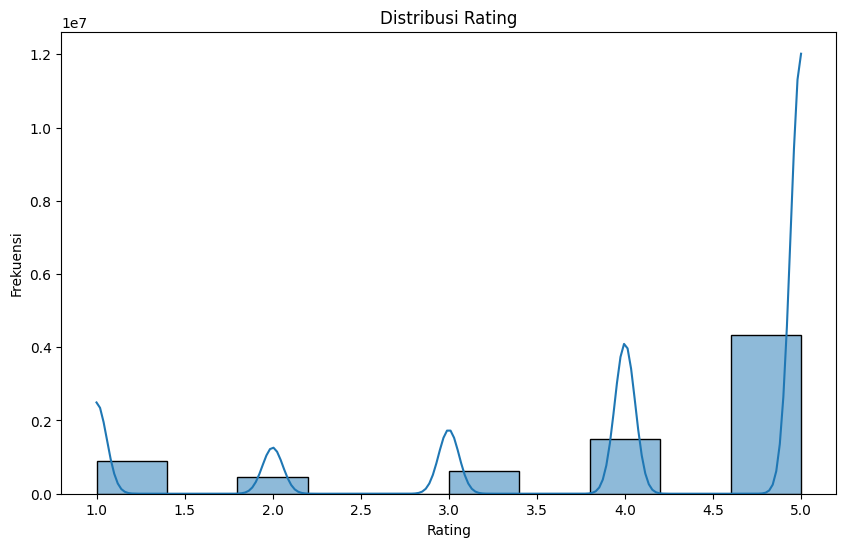

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=10, kde=True)
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()


### Visualisasi Performansi Model
Tahapan ini bertujuan untuk menampilkan performa model menggunakan metrik RMSE pada data pelatihan dan pengujian.
- model.fit(trainset): Melatih model SVD dengan data pelatihan.
- train_predictions = model.test(trainset.build_testset()): Membuat prediksi pada data pelatihan.
- train_rmse = rmse(train_predictions, verbose=False): Menghitung RMSE pada data pelatihan.
- test_rmse = rmse(predictions, verbose=False): Menghitung RMSE pada data pengujian.
- plt.figure(figsize=(10, 6)): Membuat figure dengan ukuran 10x6 inci.
- rmse_values = [train_rmse, test_rmse]: Menyimpan nilai RMSE dari data pelatihan dan pengujian.
- labels = ['Train RMSE', 'Test RMSE']: Memberi label pada nilai RMSE.
- plt.bar(labels, rmse_values, color=['blue', 'orange']): Membuat bar plot dengan warna biru untuk RMSE pelatihan dan oranye untuk RMSE pengujian.
- plt.title('RMSE of Train and Test Data'): Memberi judul pada grafik.
- plt.ylabel('RMSE'): Memberi label pada sumbu Y.
- plt.show(): Menampilkan grafik.

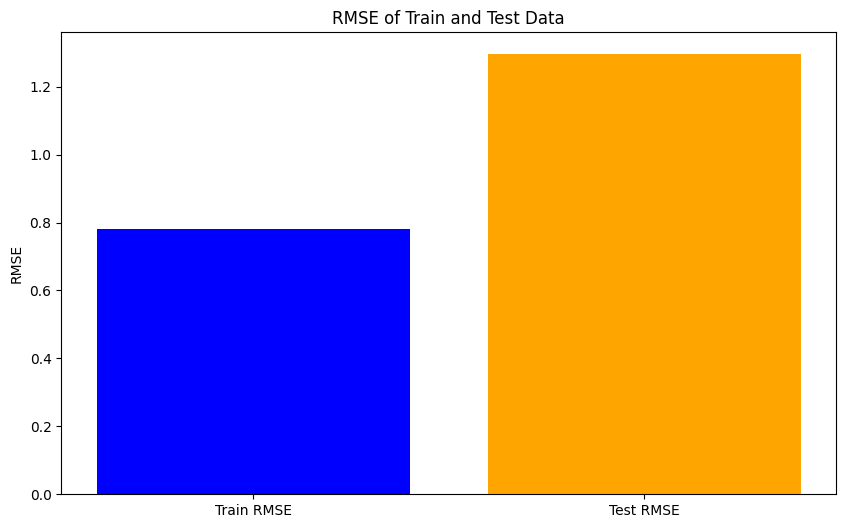

In [8]:
model.fit(trainset)
train_predictions = model.test(trainset.build_testset())
train_rmse = rmse(train_predictions, verbose=False)

test_rmse = rmse(predictions, verbose=False)

plt.figure(figsize=(10, 6))
rmse_values = [train_rmse, test_rmse]
labels = ['Train RMSE', 'Test RMSE']
plt.bar(labels, rmse_values, color=['blue', 'orange'])
plt.title('RMSE of Train and Test Data')
plt.ylabel('RMSE')
plt.show()

### Visualisasi Rekomendasi Produk
Tahapan ini bertujuan untuk menampilkan rekomendasi produk teratas untuk pengguna tertentu.
- sample_user_id = 'AKM1MP6P0OYPR': Mengatur ID pengguna sampel untuk mendapatkan rekomendasi (ganti dengan userID yang valid dari dataset Anda).
- top_n_recommendations = get_top_n_recommendations(predictions, n=10): Mendapatkan 10 rekomendasi teratas untuk semua pengguna.
- if sample_user_id in top_n_recommendations:: Mengecek apakah ada rekomendasi untuk pengguna sampel.
- products = [prod for prod, _ in top_n_recommendations[sample_user_id]]: Mendapatkan daftar produk yang direkomendasikan untuk pengguna.
- ratings = [rating for _, rating in top_n_recommendations[sample_user_id]]: Mendapatkan daftar rating yang diprediksi untuk produk yang direkomendasikan.
- plt.figure(figsize=(10, 6)): Membuat figure dengan ukuran 10x6 inci.
- plt.barh(products, ratings, color='green'): Membuat bar plot horizontal dengan warna hijau.
- plt.xlabel('Estimated Rating'): Memberi label pada sumbu X.
- plt.ylabel('Product ID'): Memberi label pada sumbu Y.
- plt.title(f'Top 10 Recommendations for User {sample_user_id}'): Memberi judul pada grafik.
- plt.gca().invert_yaxis(): Membalik sumbu Y agar produk dengan rating tertinggi berada di atas.
- plt.show(): Menampilkan grafik.
Dengan menambahkan visualisasi ini, Anda akan mendapatkan pemahaman yang lebih baik tentang distribusi data, performa model, dan rekomendasi yang dihasilkan.

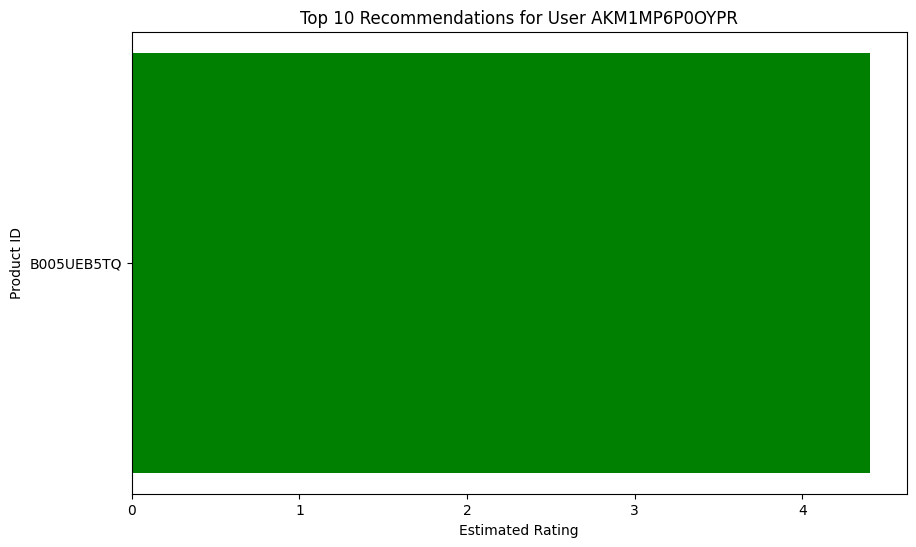

In [11]:
sample_user_id = 'AKM1MP6P0OYPR' 
top_n_recommendations = get_top_n_recommendations(predictions, n=10)

if sample_user_id in top_n_recommendations:
    products = [prod for prod, _ in top_n_recommendations[sample_user_id]]
    ratings = [rating for _, rating in top_n_recommendations[sample_user_id]]
    
    plt.figure(figsize=(10, 6))
    plt.barh(products, ratings, color='green')
    plt.xlabel('Estimated Rating')
    plt.ylabel('Product ID')
    plt.title(f'Top 10 Recommendations for User {sample_user_id}')
    plt.gca().invert_yaxis()  
    plt.show()
else:
    print(f'No recommendations available for user {sample_user_id}')